Epoch 1/20
300/300 [==============================] - 4s 8ms/step - loss: 0.3769 - accuracy: 0.7734 - val_loss: 0.2649 - val_accuracy: 0.8708
Epoch 2/20
300/300 [==============================] - 2s 7ms/step - loss: 0.1933 - accuracy: 0.9164 - val_loss: 0.1538 - val_accuracy: 0.9400
Epoch 3/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1422 - accuracy: 0.9398 - val_loss: 0.1286 - val_accuracy: 0.9500
Epoch 4/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1255 - accuracy: 0.9476 - val_loss: 0.1242 - val_accuracy: 0.9529
Epoch 5/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1178 - accuracy: 0.9510 - val_loss: 0.1160 - val_accuracy: 0.9579
Epoch 6/20
300/300 [==============================] - 2s 5ms/step - loss: 0.1089 - accuracy: 0.9571 - val_loss: 0.1083 - val_accuracy: 0.9550
Epoch 7/20
300/300 [==============================] - 2s 5ms/step - loss: 0.1057 - accuracy: 0.9589 - val_loss: 0.1109 - val_accuracy: 0.9529
Epoch 

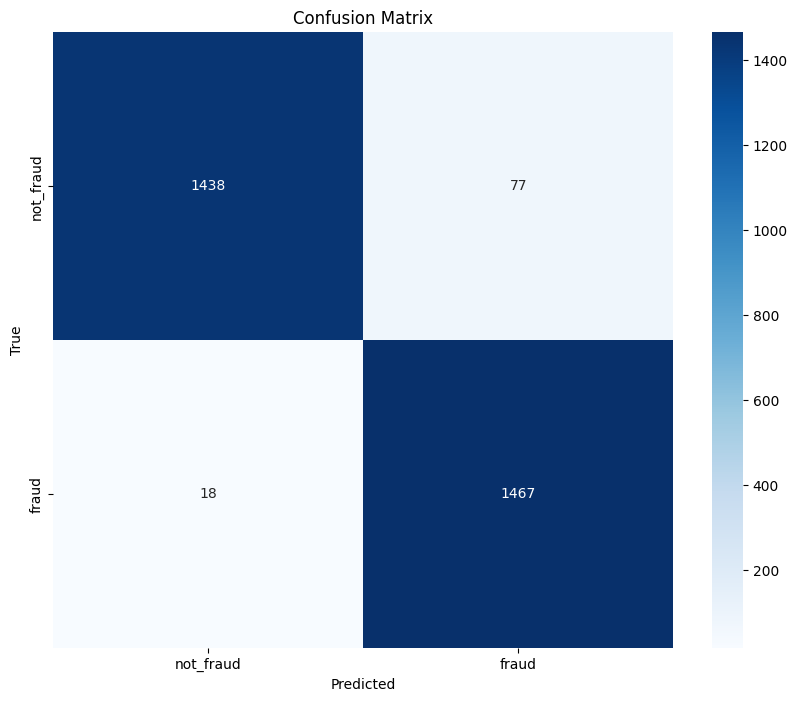

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data preprocessing function
def preprocess_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Encode categorical columns
    action_label_encoder = LabelEncoder()
    df['typeofaction'] = action_label_encoder.fit_transform(df['typeofaction'])

    # Convert date to datetime
    df['date'] = pd.to_datetime(df['date'])

    # Extract date features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute

    # Split the data into features and target
    X = df.drop(columns=['isfraud', 'typeoffraud', 'date'])
    y = df['isfraud']

    # Normalize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Convert target variable to categorical
    y = to_categorical(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

# Preprocess the data
file_path = 'generated_transactions.csv'
X_train, X_test, y_train, y_test = preprocess_data(file_path)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

# Get the correct target names
target_names = ['not_fraud', 'fraud']

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

# Print accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, target_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix, target_names)


In [ ]:
# Save the model to an HDF5 file
model.save('Anti_ML_model.h5')

print("Model saved successfully.")

Model saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
